Vectors in 3D
> TBD

## Drawing 3D Vectors in Python

Vectors (and points) in the 3D space are represented by a tuple $ \vec{v} = (x, y, z) $.

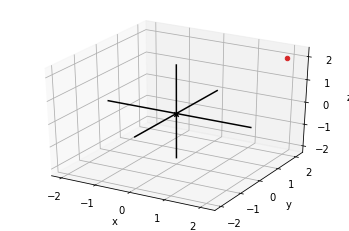

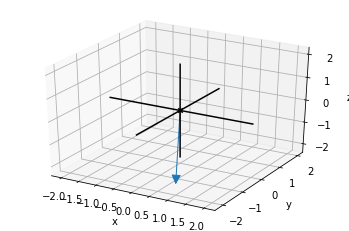

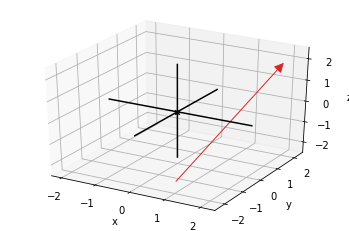

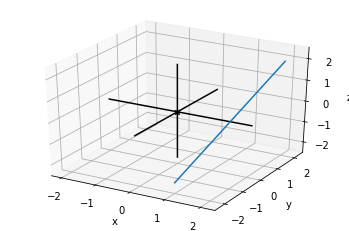

In [15]:
from draw3d import draw3d, Points3D, Arrow3D, Segment3D, red, blue

# single point
draw3d(
    Points3D((2, 2, 2), color=red)
)

# single vector, using default tail (0, 0, 0)
draw3d(
    Arrow3D((1, -2, -2), color=blue)
)

# single vector, using custom tail (1, -2, -2)
draw3d(
    Arrow3D((2, 2, 2), (1, -2, -2))
)

# segment
draw3d(
    Segment3D((2, 2, 2), (1, -2, -2))
)

Additionally, the `draw3d` library exposes a Box3D class that helps with the visualization.
`Box3D` represents a box with one corner at the origin and the opposite one at the given point.

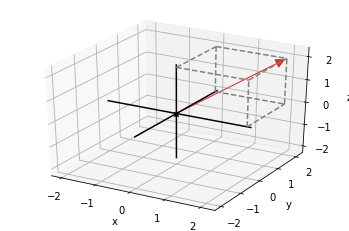

In [16]:
from draw3d import Box3D

draw3d(
    Box3D(2, 2, 2),
    Arrow3D((2, 2, 2))
)


## Vector Arithmetic in 3D

All of the arithmetic operations in 2D have analogies in 3D, and the geometric effects of those are similar in the 3D space.

### Adding 3D vectors

The vector addition can be accomplished by adding the Cartesian coordinates of the vectors. Also, the *tip-to-tail* geometric representation of the addition works in the 3D space.

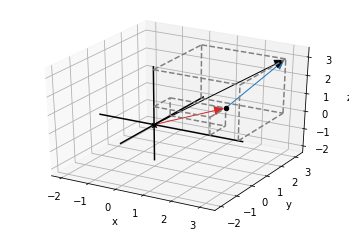

In [17]:
from draw3d import black

def add(*vectors):
    return (sum(v[0] for v in vectors), sum(v[1] for v in vectors), sum(v[2] for v in vectors))

sum_vector = add((2, 1, 1), (1, 2, 2))

draw3d(
    Points3D((2, 1, 1)),
    Arrow3D((2, 1, 1), color=red),
    Arrow3D(sum_vector, (2, 1, 1), color=blue),
    Arrow3D(sum_vector, color=black),
    Box3D(2, 1, 1),
    Box3D(*sum_vector)
)

Vector addition is commutative, and *tip-to-tail* can be applied as well when adding more than 2 vectors.

(7, 7, -3)


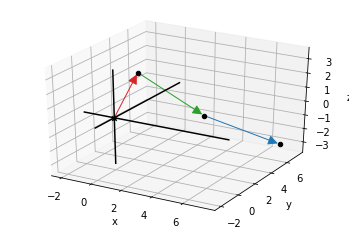

In [18]:
from draw3d import green

v1 = (1, 1, 3)
v2 = (2, 4, -4)
v3 = (4, 2, -2)

sum_vector = add(v1, v2, v3)

print(sum_vector)

draw3d(
    Arrow3D(v1, color = red),
    Arrow3D(add(v1, v2), v1, color=green), Points3D(v1),
    Arrow3D(add(v1, v2, v3), add(v1, v2), color=blue), Points3D(add(v1, v2)), Points3D(sum_vector)
)


We can write a generalized function for adding vectors that is both concise and efficient. This will work for 2D vectors, 3D vectors and even for vectors defined in spaces with more than 3 dimensions:

In [19]:
def add(*vectors):
    # this creates a list of tuples, with each tuple having all the x, y and z coordinates
    # e.g. zip((1, 2, 3), (4, 5, 6), (7, 8, 9)) = [(1, 4, 7), (2, 5, 8), (3, 6, 9)]
    by_coordinate = zip(*vectors) 

    # this creates a list with three elements, each one is the sum of the corresponding elements in the tuple
    # e.g. [sum(coords for coords in [(1, 4, 7), (2, 5, 8), (3, 6, 9)])] = [12, 15, 18]
    coordinate_sums = [sum(coords) for coords in by_coordinate]

    # finally, we transform the list into a tuple
    # e.g. [12, 15, 18] = (12, 15, 18)
    return tuple(coordinate_sums)

print(add((1, 2, 3), (4, 5, 6), (7, 8, 9)))

(12, 15, 18)


Note that there's even a way to write it more succinctly, at the cost of making it less readable:

In [20]:
def add_one_liner(*vectors):
    return tuple(map(sum, zip(*vectors)))

print(add_one_liner((1, 2, 3), (4, 5, 6), (7, 8, 9)))

(12, 15, 18)


### Scalar Multiplication in 3D

Same rule and geometric representation of scalar multiplication in 2D applies to the 3D world.

For example, $ 2 \cdot (1, 2, 3) = (2, 4, 6) $, so $ (2, 4, 6) $ is twice as long and in the same direction as $ (1, 2, 3)

(2, 4, 6)


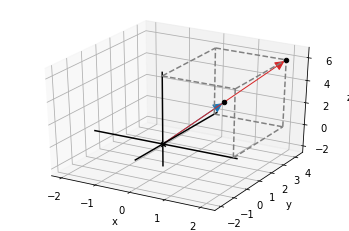

In [21]:
def scale(factor, vector):
    return tuple( factor * v_i for v_i in vector )

v = (1, 2, 3)
scaled_v = scale(2, v)
print(scaled_v)

draw3d(
    Arrow3D(v, color=blue), Points3D(v),
    Arrow3D(scaled_v, color=red), Points3D(scaled_v),
    Box3D(*scaled_v)
)


### Subtracting 3D Vectors

Same rule and geometric representation of vector subtraction in the 2D plane applies to the 3D world.

Given two vectors $ v $ and $ w $, $ v - w $ is the *displacement* from $ w $ to $ v $. That is, $ v - w $ is the vector that you have to add to $ w $ to get to $ v $.

Displacement from w to v = (-4, -5, -1)


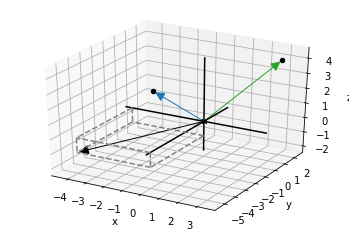

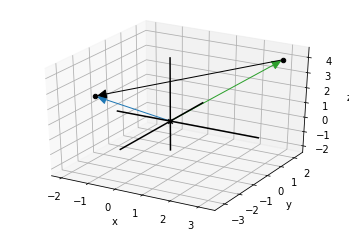

In [22]:
def subtract(v, w):
    return tuple( v[i] - w[i] for i in range(0, len(v)))

v = (-1, -3, 3)
w = (3, 2, 4)

print('Displacement from w to v = {}'.format(subtract(v, w)))

draw3d(
    Arrow3D(v, color=blue), Points3D(v),
    Arrow3D(w, color=green), Points3D(w),
    Arrow3D(subtract(v, w), color=black),
    Box3D(*subtract(v, w))
)


draw3d(
    Arrow3D(v, color=blue), Points3D(v),
    Arrow3D(w, color=green), Points3D(w),
    Arrow3D(v, w, color=black)
)

### Computing Lengths and Distances for 3D Vectors

Although we cannot apply the *Pythagorean theorem* right away, to compute the length of a vector, the formula to compute the length is a generalization of the formula for 2D:

$
\vec{v} = (x, y, z) \\
length(v) = | \vec{v} | = \sqrt{x^{2} + y^{2} + z^{2}}
$

Let's see where this formula comes from:

Let's say we have a vector $ \vec{v} = (x, y z) $

We can *build* this vector as:
$ (x, y, 0) + (0, 0, z) $

That will help as we will be able to apply the *Pythagorean theorem* if we apply this decomposition.

Let's visualize it geometrically, with the $ z = 0 $ components of the vector drawn in red

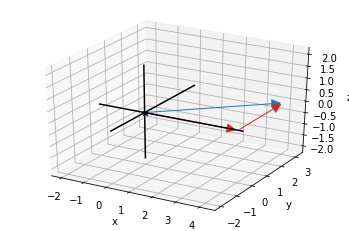

In [23]:
v = (4, 3, 12)

v_flat = (4, 3, 0)

draw3d(
    Arrow3D((4, 3, 0), color= blue),
    Arrow3D((4, 0, 0), color=red),
    Arrow3D((4, 3, 0), (4, 0, 0), color=red)
)


The blue vector is the vector $ (x, y, 0) $ which happens also to be the hypotenuse of the right triangle whose sides are the vectors $ (x, 0, 0) $ and $ (0, y, 0) $

Let's label this component as $ w $.

Then:

$
length(w) = | \vec{w} | = \sqrt{x^{2} + y^{2}}
$

As $ v = w + (0, 0, z) $, we can apply again the *Pythagorean theorem*:

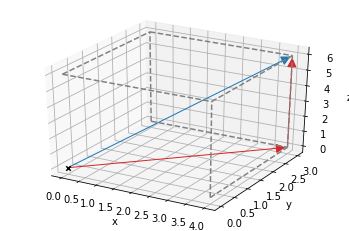

In [24]:
draw3d(
    Arrow3D((4, 3, 0), color=red),
    Arrow3D((4, 3, 6), (4, 3, 0), color=red),
    Arrow3D((4, 3, 6), color= blue),
    Box3D(4, 3, 6),
    axes=None
)

The red vector with z = 0 is $ w $, and the red perpendicular vector to the plane z = 0 is $ (0, 0, z) $.

Note that then, the blue vector happens to be the hypotenuse of another right triangle whose sides are the red vectors. Also, this vector is $ v = (x, y, z) $ $, the vector whose length we want to calculate.

As such:

$
length(v) = | \vec{v} | = \sqrt{(\sqrt{x^{2} + y^{2}})^{2} + z^2} = \\
= \sqrt{x^{2} + y^{2} + z^{2}}
$

Now, we can generalize the length function in Python for a vector in any dimension:

In [25]:
from math import sqrt

def length(v):
    return sqrt(sum([ v_i ** 2 for v_i in v]))

print('|(4, 3, 12)| = {}'.format(length((4, 3, 12))))

|(4, 3, 12)| = 13.0


### Spherical Coordinates in 3D: Angles and Directions

In 3D, one angle is not sufficient to specify a direction, so an additional one is needed.

For the first angle, we can again think of the vector without its *z* coordinate. This can be interpreted also as the projection of the vector in the plane z = 0.

This vector on the z = 0 plane will make some angle with the x axis (we'll label this angle as $ \phi $), and we can also consider the angle that the vector makes with the z index (which we'll label $ \theta $).

These three components: the length of the vector $ r $, $ \phi $, and $ \theta $ are called the spherical coordinates of the vector.

![Spherical Coordinates](../images/spherical_coordinates.png)

While the *polar coordinates* in 2D were conducive to rotations, as with a simple addition or subtraction we could rotate vectors and 2D shapes, the same is not true for the *spherical coordinates*. Therefore, the usefulness of that coordinate system does not have the same practical significance as the *polar coordinates* do in 2D.

## The *dot* product: Measuring vector alignment

Besides the scalar product used to multiply a vector with a real number, there are two ways in which vectors can be multiplied together:
+ the *dot product*, written as $ u \cdot v $, and returns an scalar
+ the *cross product*, denoted as $ u \times v $, and returns a vector

### The dot product

The dot product of two vectors $ u \cdot v $ is an operation that returns an scalars.

You can think of the dot product as a way to measure *how aligned* a pair of vectors are.

It is defined as follows:

Let $ u = (u_1, u_2, ..., u_n) $ and $ v = (v_1, v_2, ..., v_n) $ then:
$
u \cdot v = u_1 \cdot v_1 + u_2 \cdot v_2 + ... + u_n \cdot v_n
$

Then for example:
$
(1, 2, -1) \cdot (3, 0, 3) = 1 \cdot 3 + 2 \cdot 0 + -1 \cdot 3 = 0
$

Let's define the dot product as a function and start visualizing several vectors and their dot product:

u · v = 18


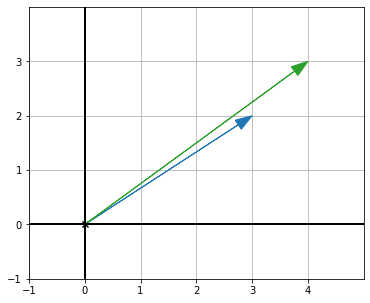

In [26]:
from math import prod
from draw2d import Arrow2D, draw2d, blue, green

def dot_product(u, v):
    by_coordinate_list = zip(u, v)
    product_by_coordinate = [prod(coords) for coords in by_coordinate_list]
    return sum(product_by_coordinate)


# Let u, v
u = (3, 2)
v = (4, 3)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

draw2d(
    Arrow2D(u, color=blue),
    Arrow2D(v, color=green)
)


We see that $ u $ and $ v $ are somewhat aligned, and their dot product is 18.

Let's now see what is the dot product of two vectors pointing also pointing to a similar direction but smaller than the previous ones:

u · v = 2.88


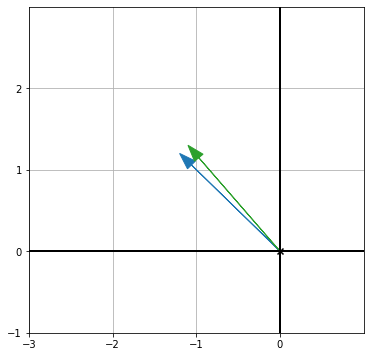

In [27]:
u = (-1.2, 1.2)
v = (-1.1, 1.3)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

draw2d(
    Arrow2D(u, color=blue),
    Arrow2D(v, color=green)
)

In this case, the dot product is still positive, but is smaller than in the case of $ u = (3, 2) $ and $ v = (4, 3) $.

Let's now see what happens with vectors pointing in oppositre or near opposite directions:

u · v = -12


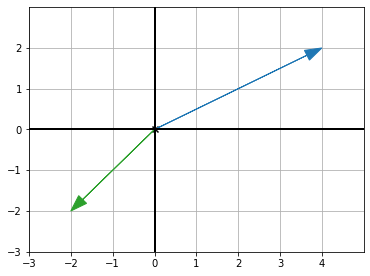

In [28]:
u = (4, 2)
v = (-2, -2)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

draw2d(
    Arrow2D(u, color=blue),
    Arrow2D(v, color=green)
)

In this case we wee that the dot product returns a negative value.

Lastly, let's see what happens when we compute the dot product of perpendicular vectors:

u · v = 0


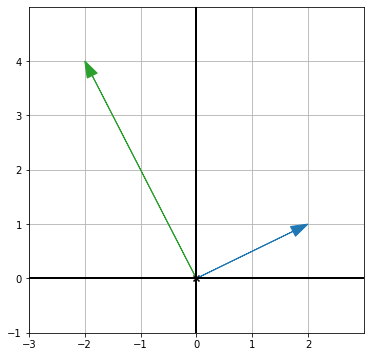

In [29]:
u = (2, 1)
v = (-2, 4)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

draw2d(
    Arrow2D(u, color=blue),
    Arrow2D(v, color=green)
)

As can be seen, the dot product of perpendicular vectors is zero.

To sum up:
> If the angle between two vectors is less than 90° (π/2) the dot product would be positive. If the angle is more than 90° the angle would be negative. If the angle is exactly 90°, the dot product would be zero.
> Longer vectors give longer dot products. That is, the dot product is proportional to each of the lengths of its input vectors.


This fact also applies to 3D vectors:

u · v = 0


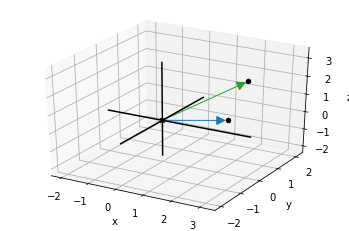

In [30]:
u = (1, 2, -1)
v = (3, 0, 3)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

draw3d(
    Arrow3D(u, color=blue), Points3D(u),
    Arrow3D(v, color=green), Points3D(v)
)

| NOTE: |
| :---- |
| Note that the perspective in the diagram above is a bit misleading and makes you think that the vectors aren't perpendicular. That is why mathematical operations like the dot product are so important. |




Let's now see a simpler implementation of the dot product that does not require importing `prod`:

In [31]:
def dot_product(u, v):
    by_coordinate_zipping = zip(u, v)
    products = [coord_u * coord_v for coord_u, coord_v in by_coordinate_zipping]
    return sum(products)

u = (1, 2, -1)
v = (3, 0, 3)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

u = (2, 3)
v = (4, 5)
dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))


u · v = 0
u · v = 23


The simplification consists in realizing that the dot product is always between two vectors, and therefore, the zipping of u and v coordinates will always have two components:

```Python
u = (u_1, u_2, u_3)
v = (v_1, v_2, v_3)

zip(u, v) => ((u_1, v_1), (u_2, v_2), (u_3, v3))
```

Therefore, we can use a finite number of vars in the list comprehension (namely two), and explicitly perform the product:

```Python
[coord_u * coord_v for coord_u, coord_v in zip(u, v)]
```

It can even be written more succinctly as below:

In [32]:
def dot_product(u, v):
    return sum([coord_u * coord_v for coord_u, coord_v in zip(u, v)])

u = (1, 2, -1)
v = (3, 0, 3)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

u = (2, 3)
v = (4, 5)
dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

u · v = 0
u · v = 23


Let's use the newly defined function to discover some additional properties of the dot product.

In the first example, we can see that vectors lying on different axes have always as dot product zero.

In [34]:
u = (2, 0)
v = (0, 5)
dot_product_result = dot_product(u, v)
print('u · v = {}'.format(dot_product_result))

u = (1, 0, 0)
v = (0, 0, 5)
dot_product_result = dot_product(u, v)
print('u · v = {}'.format(dot_product_result))


u · v = 0
u · v = 0


The second characteristic is that longer vectors give longer dot products:

In [37]:
u = (3, 4)
v = (2, 3)
dot_product_result = dot_product(u, v)
print('u · v = {}'.format(dot_product_result))

dot_product_result = dot_product(scale(2, u), v)
print('u · v = {}'.format(dot_product_result))

u · v = 18
u · v = 36


The dot product is proportional to each of the lengths of its input vectors. In particular, when the vectors lie in the same direction, the dot product is equal to the product of its lengths:

In [38]:
u = (4, 3)
v = (8, 6)
dot_product_result = dot_product(u, v)
print('u · v = {}'.format(dot_product_result))

print('|u|={}'.format(length(u)))
print('|v|={}'.format(length(v)))

u · v = 50
|u|=5.0
|v|=10.0


The dot product of two vectors of length $ |u| $ and $ |v| $ ranges from $ |u| \cdot |v| $ when they lie in the same direction to $ - |u| \cdot |v| $ when they lie in opposite directions.
The dot product of those two vectors will be zero when they are in an 90° angle.

## Measuring Angles with the Dot Product

We've seen that the dot product ranges from 1 to -1 times the product of the lengths of the vectors being *dot multiplied*, as the angles ranges from 0° to 180°.

Let's remember now the behavior of one of the trigonometric functions we saw in the previous chapter: the *cosine*.

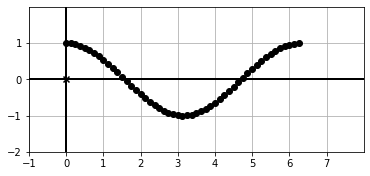

In [47]:
import numpy as np
from math import cos, pi
from draw2d import Points2D

x_values = [x for x in np.arange(0, 2*pi, 0.125)]
y_values = [cos(x) for x in x_values]

points = zip(x_values, y_values)

draw2d(
    Points2D(*points)
)

Actually, it will look better if we use `matplotlib` directly:

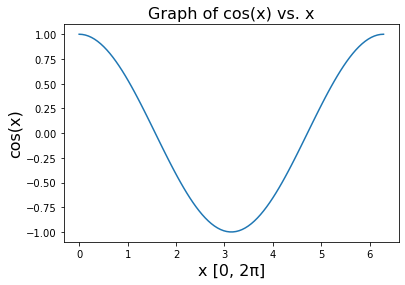

In [58]:
import matplotlib.pyplot as plt

# NumPy seems to be super-useful: get 100 numbers evenly spaced in the range [0, 2*pi]
x = np.linspace(0, 2 *pi, 100) 
plt.plot(x , np.cos(x)) # look ma, no list comprehensions with np.cos()
plt.title('Graph of cos(x) vs. x', fontsize=16)
plt.xlabel('x [0, 2π]', fontsize=16)
plt.ylabel('cos(x)', fontsize=16)
plt.show()

So we see that cos(0°) = 1, cos(90°) = 0, cos(180°) = -1...

It turns out, that the dot product can also be calculated as:

$
 \vec{u} \cdot \vec{v} = |\vec{u}| \cdot |\vec{v}| \cdot cos(\theta)
$

where $ \theta $ is the angle between $ \vec{u} $ and $ \vec{v} $.

This gives us a new way to calculate the dot product. For example, given two vectors of length 3 and 2 that are 75° apart:

In [60]:
def to_radians(degrees):
  return (degrees * pi) / 180

dot_product_result = 3 * 2 * cos(to_radians(75))

print('u · v = {}'.format(dot_product_result))

u · v = 1.5529142706151244


This also gives us a way to calculate the angle between two vectors, given their Cartesian coordinates.

For example, the angle between (3, 4) and (4, 3) is:

$
u = (3, 4) \\
v = (4, 3) \\
u \cdot v = 3 \cdot 4 + 4 \cdot 3 = 24 = |u| \cdot |v| \cdot cos(\theta) = \\
= 5 \cdot 5 \cdot cos(\theta) \\
\theta = arccos(\frac{24}{25}) \approx 0.284 \approx 16.3°
$


angle between u and v = 0.283794109208328 radians = 16.260204708311967 °


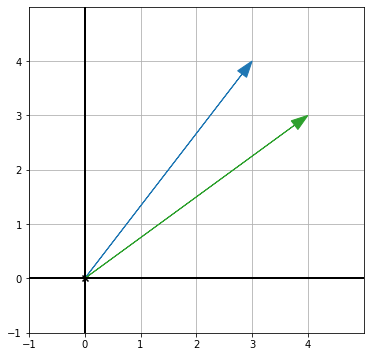

In [63]:
from math import acos

def to_degrees(radians):
  return (radians * 180) / pi

u = (3, 4)
v = (4, 3)

u_length = length(u)
v_length = length(v)
dot_product_result = dot_product(u, v)

theta = acos(dot_product_result / (u_length * v_length))

print('angle between u and v = {} radians = {} °'.format(theta, to_degrees(theta)))

draw2d(
    Arrow2D(u, color=blue),
    Arrow2D(v, color=green)
)



The formula is valid in any dimension.

For example, the angle between (1, 2, 2) and (2, 2, 1):

θ = 0.47588224966041665 radians = 27.266044450732828 °


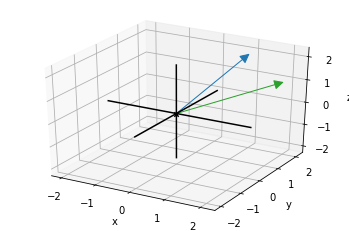

In [67]:
u = (1, 2, 2)
v = (2, 2, 1)

def angle_between_vectors(u, v):
    return acos(dot_product(u, v) / (length(u) * length(v)))

theta = angle_between_vectors(u, v)
print('θ = {} radians = {} °'.format(theta, to_degrees(theta)))

draw3d(
    Arrow3D(u, color=blue),
    Arrow3D(v, color=green)
)

## The cross product: Measuring oriented area

Before jumping into the cross product definition, is important to clarify the orientation. In order to clarify the orientation of the axis (which direction points to the positive, x, y and z) the *right-hand rule* is used:
> If you point your right index finger towards the positive y axis, your thumb tells you the direction of the positive z.

![Right-hand rule](../images/right-hand_rule.png)

We will use the right-handed orientation.

Given two input vectors, the cross product output a result that is perpendicular to both, in the direction of the right-hand rule.
![Cross Product](../images/cross_product.png)

With regards to the length, the cross product measures how *perpendicular* the vectors are. That is, it tells us how big the are spanned by the two input vectors are.

![Cross Product Geometrically](../images/cross_product_geometrically.png)

Thus, for two any given vectors, the area will be maximized when they are perpendicular (it will be a rectangle), and zero when the vectors lie in the same direction (area will be zero).

Let's finally give the formula and the Python function for the cross product of two vectors:

Let $ u = (u_x, u_y, u_z) $ and $ v = (v_x, v_y, v_z) $. 
Then:

$
\vec{u} \times \vec{v} = (u_y \cdot v_z - u_z \cdot v_y, u_z \cdot v_x - u_x \cdot v_z, u_x \cdot v_y - u_y \cdot v_x) 
$

In [68]:
def cross_product(u, v):
    ux, uy, uz = u
    vx, vy, vz = v
    return (uy * vz - uz * vy, uz * vx - ux * vz, ux * vy - uy * vx)

u = (1, 1, 0)
v = (-2, 1, 0)

print('u x v = {}'.format(u, v))


u x v = (1, 1, 0)
